## Project Title: Exploring Movie Success: Revenue, Ratings, and Genre Analysis


## Business Understanding 
Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

## Introduction 
The success of a movie is influenced by multiple factors, including genre, release timing, audience reception, and market performance. Understanding these factors can help studios make informed decisions to maximize both critical acclaim and financial returns. This analysis explores the relationships between movie ratings, genres, release months, and box office performance, aiming to provide actionable insights for strategic planning in movie production and distribution. By examining patterns in domestic and worldwide profits, as well as audience ratings, the study identifies key drivers of commercial success and offers recommendations to optimize future releases.

## Problem Statement
Studios often struggle to predict which factors,such as genre, release timing, or ratings drive a movie’s financial success. This study aims to identify the key drivers of profitability to guide better production and release decisions.

## Objectives

1. To analyze how movie genre impacts domestic and worldwide box office profits.  
2. To examine the effect of release month on movie profitability.
3. To investigate the relationship between audience ratings and box office success.
4. To determine whether domestic performance can predict worldwide earnings.
5. To provide actionable recommendations for optimizing movie production and release strategies.

## Data Understanding
The dataset used in this analysis contains information about movies, including their genre, release date, audience ratings, domestic gross, and worldwide gross. It provides insights into both critical reception and financial performance, allowing for an examination of patterns and relationships that influence movie success.It contained various dataset file formarts, tsvs, csvs and an sqlite dataase, which all contained various columns eg genre, release date, audience ratings, domestic gross, and worldwide gross just to mention a few. These multiple datasets enable analysis of correlations between ratings, genre, release timing, and profits, helping to identify the factors most critical to commercial success.

### Importing all Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import binom


### Exploratory Data Analysis (EDA)
Exploratory Data Analysis was conducted to understand patterns, trends, and relationships in the movie dataset.

In [2]:
# Reading into the bom csv files to clean and aggregate the columns we need for analysis
bom = pd.read_csv("bom.movie_gross.csv")

#Get a feel of how the data looks like
bom.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [3]:
bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [4]:
bom.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [5]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [6]:
bom['foreign_gross'] = pd.to_numeric(bom['foreign_gross'], errors='coerce')

In [7]:
bom['foreign_gross'].astype(float)

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3382            NaN
3383            NaN
3384            NaN
3385            NaN
3386            NaN
Name: foreign_gross, Length: 3387, dtype: float64

In [8]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2032 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [9]:
#Check missing rows in the bomdf
bom.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1355
year                 0
dtype: int64

In [10]:
bom['foreign_gross'] = bom['foreign_gross'].fillna(bom['foreign_gross'].mean())
bom['domestic_gross'] = bom['domestic_gross'].fillna(bom['domestic_gross'].mean())

In [11]:
bom.isna().sum()

title             0
studio            5
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [12]:
bom=bom.dropna()

In [13]:
bom['studio'].isna().sum()

0

In [14]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


In [15]:
bom.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3382    False
3383    False
3384    False
3385    False
3386    False
Length: 3382, dtype: bool

In [16]:
bomdf = ['title','domestic_gross','foreign_gross']
bom = bom[bomdf]

In [17]:
bom

,title,domestic_gross,foreign_gross
0,Toy Story 3,415000000.0,6.520000e+08
1,Alice in Wonderland (2010),334200000.0,6.913000e+08
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,6.643000e+08
3,Inception,292600000.0,5.357000e+08
4,Shrek Forever After,238700000.0,5.139000e+08
...,...,...,...
3382,The Quake,6200.0,7.505704e+07
3383,Edward II (2018 re-release),4800.0,7.505704e+07
3384,El Pacto,2500.0,7.505704e+07
3385,The Swan,2400.0,7.505704e+07


In [18]:
rt_movie = pd.read_table("rt.movie_info.tsv")

In [19]:
rt_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [20]:
rt_movie.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [21]:
rt_movie['runtime'] = rt_movie['runtime'].str.replace('minutes', '',regex=False)
rt_movie['runtime']

0       104 
1       108 
2       116 
3       128 
4       200 
        ... 
1555    106 
1556     88 
1557    111 
1558    101 
1559     94 
Name: runtime, Length: 1560, dtype: object

In [22]:
rt_movie['runtime'] = pd.to_numeric(rt_movie['runtime'], errors='coerce')

In [23]:
rt_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1560 non-null   int64  
 1   synopsis      1498 non-null   object 
 2   rating        1557 non-null   object 
 3   genre         1552 non-null   object 
 4   director      1361 non-null   object 
 5   writer        1111 non-null   object 
 6   theater_date  1201 non-null   object 
 7   dvd_date      1201 non-null   object 
 8   currency      340 non-null    object 
 9   box_office    340 non-null    object 
 10  runtime       1530 non-null   float64
 11  studio        494 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 146.4+ KB


In [24]:
rt_movie['runtime'].value_counts()

runtime
90.0     72
95.0     66
100.0    51
93.0     47
96.0     43
         ..
154.0     1
166.0     1
33.0      1
54.0      1
290.0     1
Name: count, Length: 142, dtype: int64

In [25]:
rt_movie['runtime'] = rt_movie['runtime'].fillna(rt_movie['runtime'].mode()[0])
rt_movie['runtime'].value_counts()

runtime
90.0     102
95.0      66
100.0     51
93.0      47
96.0      43
        ... 
154.0      1
166.0      1
33.0       1
54.0       1
290.0      1
Name: count, Length: 142, dtype: int64

In [26]:
rt_movie.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime            0
studio          1066
dtype: int64

In [27]:
rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104.0,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108.0,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116.0,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128.0,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200.0,NaN


In [28]:
rt_reviews = pd.read_table("rt.reviews.tsv" , encoding="latin1")
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [29]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [30]:
rt_reviews["rating"] = pd.to_numeric(rt_reviews["rating"], errors='coerce').astype("float64")

In [31]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          54432 non-null  int64  
 1   review      48869 non-null  object 
 2   rating      750 non-null    float64
 3   fresh       54432 non-null  object 
 4   critic      51710 non-null  object 
 5   top_critic  54432 non-null  int64  
 6   publisher   54123 non-null  object 
 7   date        54432 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.3+ MB


In [32]:
rt_reviews.isna().sum()

id                0
review         5563
rating        53682
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [33]:
rt_reviews['top_critic'].value_counts()

top_critic
0    41336
1    13096
Name: count, dtype: int64

In [34]:
rt_reviews_1 = pd.read_table("rt.reviews.tsv" , encoding="latin1")

In [35]:
rt_reviews_1 = rt_reviews_1.dropna()

In [36]:
rt_reviews_1.isna().sum()

id            0
review        0
rating        0
fresh         0
critic        0
top_critic    0
publisher     0
date          0
dtype: int64

In [37]:
rt_reviews_1.duplicated()

0        False
6        False
7        False
11       False
12       False
         ...  
54419    False
54420    False
54421    False
54422    False
54424    False
Length: 33988, dtype: bool

In [38]:
rt_reviews_1.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"


In [39]:
df_tmdb = pd.read_csv("tmdb.movies.csv")
df_tmdb.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [40]:
df_tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [41]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [42]:
# check for duplicates
df_tmdb.duplicated().sum()

0

In [43]:
df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date']).dt.month


In [44]:
df_tmdb["genre_ids"].value_counts().sort_index(ascending=False)

genre_ids
[]                               2479
[99]                             3700
[99, 99]                            2
[99, 99, 99]                        1
[99, 9648]                          4
                                 ... 
[10402, 10751, 14, 10770, 35]       1
[10402, 10749]                      3
[10402, 10749, 35]                  2
[10402, 10749, 35, 18]              3
[10402, 10749, 18]                  2
Name: count, Length: 2477, dtype: int64

In [45]:
df_tmdb = df_tmdb.rename(columns={'release_date':'release_month'})

In [46]:
tmdbdf = ['title','vote_average','vote_count','release_month']
df_tmdb = df_tmdb[tmdbdf]

In [47]:
df_tmdb

,title,vote_average,vote_count,release_month
0,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,11
1,How to Train Your Dragon,7.7,7610,3
2,Iron Man 2,6.8,12368,5
3,Toy Story,7.9,10174,11
4,Inception,8.3,22186,7
...,...,...,...,...
26512,Laboratory Conditions,0.0,1,10
26513,_EXHIBIT_84xxx_,0.0,1,5
26514,The Last One,0.0,1,10
26515,Trailer Made,0.0,1,6


In [48]:
df_tn = pd.read_csv("tn.movie_budgets.csv")
df_tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [49]:
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [50]:
df_tn['domestic_gross'] = df_tn['domestic_gross'].str.replace('$', '',regex=False)
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].str.replace('$', '',regex=False)
df_tn['production_budget'] = df_tn['production_budget'].str.replace('$', '',regex=False)

In [51]:
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"425,000,000","760,507,625","2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"350,000,000","42,762,350","149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747"


In [52]:
df_tn['production_budget'] = df_tn['production_budget'].str.replace('NA', '0',regex=False)
df_tn['domestic_gross'] = df_tn['domestic_gross'].str.replace('NA', '0',regex=False)
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].str.replace('NA', '0',regex=False)
df_tn['production_budget'] = df_tn['production_budget'].str.replace(',', '',regex=False)
df_tn['domestic_gross'] = df_tn['domestic_gross'].str.replace(',', '',regex=False)
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].str.replace(',', '',regex=False)

In [53]:
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [54]:
df_tn['domestic_gross'] = pd.to_numeric(df_tn['domestic_gross'], errors='coerce').astype("float64")
df_tn['worldwide_gross'] = pd.to_numeric(df_tn['worldwide_gross'], errors='coerce').astype("float64")
df_tn['production_budget'] = pd.to_numeric(df_tn['production_budget'], errors='coerce').astype("float64")

In [55]:
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [56]:
df_tn = df_tn.rename(columns={'movie':'title'})

In [57]:
tndf = ['title','production_budget','domestic_gross','worldwide_gross']
df_tn = df_tn[tndf]

In [58]:
df_tn

,title,production_budget,domestic_gross,worldwide_gross
0,Avatar,425000000.0,760507625.0,2.776345e+09
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...
5777,Red 11,7000.0,0.0,0.000000e+00
5778,Following,6000.0,48482.0,2.404950e+05
5779,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [59]:
import sqlite3 

conn = sqlite3.connect("im.db")

df2_sql = """ 
         SELECT name
         FROM SQLITE_MASTER
      """
pd.read_sql_query(df2_sql,conn)      



,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [60]:
movie_ratingssql = """ SELECT movie_basics.movie_id, 
                     movie_basics.genres,movie_basics.primary_title,movie_ratings.averagerating,
                     movie_ratings.numvotes,movie_akas.region,movie_akas.language
                     FROM movie_basics 
                     JOIN movie_ratings ON movie_ratings.movie_id = movie_basics.movie_id
                     JOIN movie_akas ON movie_akas.movie_id = movie_ratings.movie_id
                     """
movie_ratingssql = pd.read_sql_query(movie_ratingssql,conn)

In [61]:
movie_ratingssql.to_csv('databasecsv.csv', index=False, encoding='utf-8')

In [62]:
dfdatabase = pd.read_csv('databasecsv.csv')
dfdatabase

,movie_id,genres,primary_title,averagerating,numvotes,region,language
0,tt0063540,"Action,Crime,Drama",Sunghursh,7.0,77,NaN,NaN
1,tt0063540,"Action,Crime,Drama",Sunghursh,7.0,77,IN,NaN
2,tt0063540,"Action,Crime,Drama",Sunghursh,7.0,77,IN,hi
3,tt0063540,"Action,Crime,Drama",Sunghursh,7.0,77,IN,hi
4,tt0063540,"Action,Crime,Drama",Sunghursh,7.0,77,IN,hi
...,...,...,...,...,...,...,...
261801,tt9905462,Drama,Pengalila,8.4,600,IN,NaN
261802,tt9905462,Drama,Pengalila,8.4,600,IN,en
261803,tt9911774,Drama,Padmavyuhathile Abhimanyu,8.4,365,NaN,NaN
261804,tt9911774,Drama,Padmavyuhathile Abhimanyu,8.4,365,IN,ml


In [63]:
dfdatabase = dfdatabase.drop_duplicates()

In [64]:
dfdatabase.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242723 entries, 0 to 261804
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   movie_id       242723 non-null  object 
 1   genres         241653 non-null  object 
 2   primary_title  242723 non-null  object 
 3   averagerating  242723 non-null  float64
 4   numvotes       242723 non-null  int64  
 5   region         205843 non-null  object 
 6   language       35124 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 14.8+ MB


In [65]:
dfdatabase.isna().sum()

movie_id              0
genres             1070
primary_title         0
averagerating         0
numvotes              0
region            36880
language         207599
dtype: int64

In [66]:
dfdatabasedrop = dfdatabase.dropna()

In [67]:
dfdatabasedrop.isna().sum()

movie_id         0
genres           0
primary_title    0
averagerating    0
numvotes         0
region           0
language         0
dtype: int64

In [68]:
dfdatabasedrop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34992 entries, 2 to 261804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       34992 non-null  object 
 1   genres         34992 non-null  object 
 2   primary_title  34992 non-null  object 
 3   averagerating  34992 non-null  float64
 4   numvotes       34992 non-null  int64  
 5   region         34992 non-null  object 
 6   language       34992 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.1+ MB


In [69]:
dfdatabasedrop

,movie_id,genres,primary_title,averagerating,numvotes,region,language
2,tt0063540,"Action,Crime,Drama",Sunghursh,7.0,77,IN,hi
8,tt0066787,"Biography,Drama",One Day Before the Rainy Season,7.2,43,XWW,en
23,tt0069204,"Comedy,Drama",Sabse Bada Sukh,6.1,13,IN,bn
24,tt0069204,"Comedy,Drama",Sabse Bada Sukh,6.1,13,IN,en
29,tt0100275,"Comedy,Drama,Fantasy",The Wandering Soap Opera,6.5,119,XWW,en
...,...,...,...,...,...,...,...
261791,tt9899850,"Drama,Thriller",The Agitation,4.9,14,XWW,en
261794,tt9899860,"Drama,Thriller",Watching This Movie Is a Crime,8.1,7,XWW,en
261796,tt9899880,Comedy,Columbus,5.8,5,IR,fa
261802,tt9905462,Drama,Pengalila,8.4,600,IN,en


In [70]:
dfdatabasedrop = dfdatabasedrop.rename(columns={'primary_title':'title'})

In [71]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3382 entries, 0 to 3386
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   domestic_gross  3382 non-null   float64
 2   foreign_gross   3382 non-null   float64
dtypes: float64(2), object(1)
memory usage: 105.7+ KB


In [72]:
themovie_df = (
    bom
    .merge(df_tmdb, on='title')
    .merge(df_tn, on='title')
    .merge(dfdatabasedrop, on='title')
)
#themovie_df = pd.merge(bom,df_tmdb,df_tn,dfdatabasedrop, on = 'title')

In [73]:
themovie_df

,title,domestic_gross_x,foreign_gross,vote_average,vote_count,release_month,production_budget,domestic_gross_y,worldwide_gross,movie_id,genres,averagerating,numvotes,region,language
0,Toy Story 3,415000000.0,6.520000e+08,7.7,8340,6,200000000.0,415004880.0,1.068880e+09,tt0435761,"Adventure,Animation,Comedy",8.3,682218,BG,bg
1,Toy Story 3,415000000.0,6.520000e+08,7.7,8340,6,200000000.0,415004880.0,1.068880e+09,tt0435761,"Adventure,Animation,Comedy",8.3,682218,CA,fr
2,Toy Story 3,415000000.0,6.520000e+08,7.7,8340,6,200000000.0,415004880.0,1.068880e+09,tt0435761,"Adventure,Animation,Comedy",8.3,682218,CN,cmn
3,Toy Story 3,415000000.0,6.520000e+08,7.7,8340,6,200000000.0,415004880.0,1.068880e+09,tt0435761,"Adventure,Animation,Comedy",8.3,682218,HK,yue
4,Toy Story 3,415000000.0,6.520000e+08,7.7,8340,6,200000000.0,415004880.0,1.068880e+09,tt0435761,"Adventure,Animation,Comedy",8.3,682218,IL,he
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6005,Gotti,4300000.0,7.505704e+07,5.2,231,6,10000000.0,4286367.0,6.089100e+06,tt1801552,"Biography,Crime,Drama",4.8,10358,CA,fr
6006,Mandy,1200000.0,7.505704e+07,3.5,2,1,6000000.0,1214525.0,1.427656e+06,tt6998518,"Action,Fantasy,Horror",6.6,44378,CA,fr
6007,Mandy,1200000.0,7.505704e+07,6.2,618,9,6000000.0,1214525.0,1.427656e+06,tt6998518,"Action,Fantasy,Horror",6.6,44378,CA,fr
6008,Lean on Pete,1200000.0,7.505704e+07,6.9,133,4,8000000.0,1163056.0,2.455027e+06,tt5340300,"Adventure,Drama",7.2,8607,TR,tr


In [74]:
themovie_df = themovie_df.drop_duplicates()

In [75]:
themovie_df.value_counts().sum()

5461

In [76]:
themovie_df

,title,domestic_gross_x,foreign_gross,vote_average,vote_count,release_month,production_budget,domestic_gross_y,worldwide_gross,movie_id,genres,averagerating,numvotes,region,language
0,Toy Story 3,415000000.0,6.520000e+08,7.7,8340,6,200000000.0,415004880.0,1.068880e+09,tt0435761,"Adventure,Animation,Comedy",8.3,682218,BG,bg
1,Toy Story 3,415000000.0,6.520000e+08,7.7,8340,6,200000000.0,415004880.0,1.068880e+09,tt0435761,"Adventure,Animation,Comedy",8.3,682218,CA,fr
2,Toy Story 3,415000000.0,6.520000e+08,7.7,8340,6,200000000.0,415004880.0,1.068880e+09,tt0435761,"Adventure,Animation,Comedy",8.3,682218,CN,cmn
3,Toy Story 3,415000000.0,6.520000e+08,7.7,8340,6,200000000.0,415004880.0,1.068880e+09,tt0435761,"Adventure,Animation,Comedy",8.3,682218,HK,yue
4,Toy Story 3,415000000.0,6.520000e+08,7.7,8340,6,200000000.0,415004880.0,1.068880e+09,tt0435761,"Adventure,Animation,Comedy",8.3,682218,IL,he
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6004,Gotti,4300000.0,7.505704e+07,5.2,231,6,10000000.0,4286367.0,6.089100e+06,tt1801552,"Biography,Crime,Drama",4.8,10358,BG,bg
6005,Gotti,4300000.0,7.505704e+07,5.2,231,6,10000000.0,4286367.0,6.089100e+06,tt1801552,"Biography,Crime,Drama",4.8,10358,CA,fr
6006,Mandy,1200000.0,7.505704e+07,3.5,2,1,6000000.0,1214525.0,1.427656e+06,tt6998518,"Action,Fantasy,Horror",6.6,44378,CA,fr
6007,Mandy,1200000.0,7.505704e+07,6.2,618,9,6000000.0,1214525.0,1.427656e+06,tt6998518,"Action,Fantasy,Horror",6.6,44378,CA,fr


In [77]:
themovie_dropcol = themovie_df.drop(columns= ['language', 'region'])

In [78]:
themovie_df2 = themovie_dropcol.drop_duplicates()

In [79]:
themovie_df2

,title,domestic_gross_x,foreign_gross,vote_average,vote_count,release_month,production_budget,domestic_gross_y,worldwide_gross,movie_id,genres,averagerating,numvotes
0,Toy Story 3,415000000.0,6.520000e+08,7.7,8340,6,200000000.0,415004880.0,1.068880e+09,tt0435761,"Adventure,Animation,Comedy",8.3,682218
8,Inception,292600000.0,5.357000e+08,8.3,22186,7,160000000.0,292576195.0,8.355246e+08,tt1375666,"Action,Adventure,Sci-Fi",8.8,1841066
17,Shrek Forever After,238700000.0,5.139000e+08,6.1,3843,5,165000000.0,238736787.0,7.562447e+08,tt0892791,"Adventure,Animation,Comedy",6.3,167532
25,The Twilight Saga: Eclipse,300500000.0,3.980000e+08,6.0,4909,6,68000000.0,300531751.0,7.061028e+08,tt1325004,"Adventure,Drama,Fantasy",5.0,211733
30,Iron Man 2,312400000.0,3.115000e+08,6.8,12368,5,170000000.0,312433331.0,6.211564e+08,tt1228705,"Action,Adventure,Sci-Fi",7.0,657690
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6000,Destroyer,1500000.0,4.000000e+06,5.9,176,12,9000000.0,1533324.0,3.681096e+06,tt7137380,"Action,Crime,Drama",6.2,13683
6004,Gotti,4300000.0,7.505704e+07,5.2,231,6,10000000.0,4286367.0,6.089100e+06,tt1801552,"Biography,Crime,Drama",4.8,10358
6006,Mandy,1200000.0,7.505704e+07,3.5,2,1,6000000.0,1214525.0,1.427656e+06,tt6998518,"Action,Fantasy,Horror",6.6,44378
6007,Mandy,1200000.0,7.505704e+07,6.2,618,9,6000000.0,1214525.0,1.427656e+06,tt6998518,"Action,Fantasy,Horror",6.6,44378


In [80]:
themovie_df2.to_csv('databaseforvisio.csv', index=False, encoding='utf-8')

In [81]:
themovie_df2['profit'] = themovie_df2['worldwide_gross'] - themovie_df2['production_budget']
themovie_df2['d_profit'] = themovie_df2['domestic_gross_y'] - themovie_df2['production_budget']


/tmp/ipykernel_21326/1521134713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  themovie_df2['profit'] = themovie_df2['worldwide_gross'] - themovie_df2['production_budget']
/tmp/ipykernel_21326/1521134713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  themovie_df2['d_profit'] = themovie_df2['domestic_gross_y'] - themovie_df2['production_budget']


In [82]:
themovie_df2

,title,domestic_gross_x,foreign_gross,vote_average,vote_count,release_month,production_budget,domestic_gross_y,worldwide_gross,movie_id,genres,averagerating,numvotes,profit,d_profit
0,Toy Story 3,415000000.0,6.520000e+08,7.7,8340,6,200000000.0,415004880.0,1.068880e+09,tt0435761,"Adventure,Animation,Comedy",8.3,682218,868879522.0,215004880.0
8,Inception,292600000.0,5.357000e+08,8.3,22186,7,160000000.0,292576195.0,8.355246e+08,tt1375666,"Action,Adventure,Sci-Fi",8.8,1841066,675524642.0,132576195.0
17,Shrek Forever After,238700000.0,5.139000e+08,6.1,3843,5,165000000.0,238736787.0,7.562447e+08,tt0892791,"Adventure,Animation,Comedy",6.3,167532,591244673.0,73736787.0
25,The Twilight Saga: Eclipse,300500000.0,3.980000e+08,6.0,4909,6,68000000.0,300531751.0,7.061028e+08,tt1325004,"Adventure,Drama,Fantasy",5.0,211733,638102828.0,232531751.0
30,Iron Man 2,312400000.0,3.115000e+08,6.8,12368,5,170000000.0,312433331.0,6.211564e+08,tt1228705,"Action,Adventure,Sci-Fi",7.0,657690,451156389.0,142433331.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6000,Destroyer,1500000.0,4.000000e+06,5.9,176,12,9000000.0,1533324.0,3.681096e+06,tt7137380,"Action,Crime,Drama",6.2,13683,-5318904.0,-7466676.0
6004,Gotti,4300000.0,7.505704e+07,5.2,231,6,10000000.0,4286367.0,6.089100e+06,tt1801552,"Biography,Crime,Drama",4.8,10358,-3910900.0,-5713633.0
6006,Mandy,1200000.0,7.505704e+07,3.5,2,1,6000000.0,1214525.0,1.427656e+06,tt6998518,"Action,Fantasy,Horror",6.6,44378,-4572344.0,-4785475.0
6007,Mandy,1200000.0,7.505704e+07,6.2,618,9,6000000.0,1214525.0,1.427656e+06,tt6998518,"Action,Fantasy,Horror",6.6,44378,-4572344.0,-4785475.0


## Statistical testing, insights extraction, and actionable recommendations.

### What Genre of movie receives the highest ratings?

In [83]:
# Split and explode genres if not already done
themovie_df2['genres'] = themovie_df2['genres'].str.split(',')
themovie_df2 = themovie_df2.explode('genres')
themovie_df2['genres'] = themovie_df2['genres'].str.strip()

# Average rating by genre
genre_ratings = (
    themovie_df2.groupby('genres')['averagerating']
      .mean()
      .sort_values(ascending=False)
)

genre_ratings.head(10)


/tmp/ipykernel_21326/3119211118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  themovie_df2['genres'] = themovie_df2['genres'].str.split(',')


genres
Documentary    7.170588
History        7.155556
Biography      7.024031
Sport          6.947619
War            6.857143
Western        6.800000
Drama          6.690831
Animation      6.687912
Musical        6.633333
Sci-Fi         6.604386
Name: averagerating, dtype: float64

In [84]:
themovie_df2['genres'].value_counts(sort="descending")

genres
Drama          698
Comedy         450
Action         389
Adventure      321
Thriller       253
Crime          212
Romance        188
Horror         150
Biography      129
Mystery        116
Sci-Fi         114
Fantasy        108
Animation       91
Family          71
History         45
Music           40
Sport           21
Documentary     17
War             14
Western          8
Musical          3
Name: count, dtype: int64

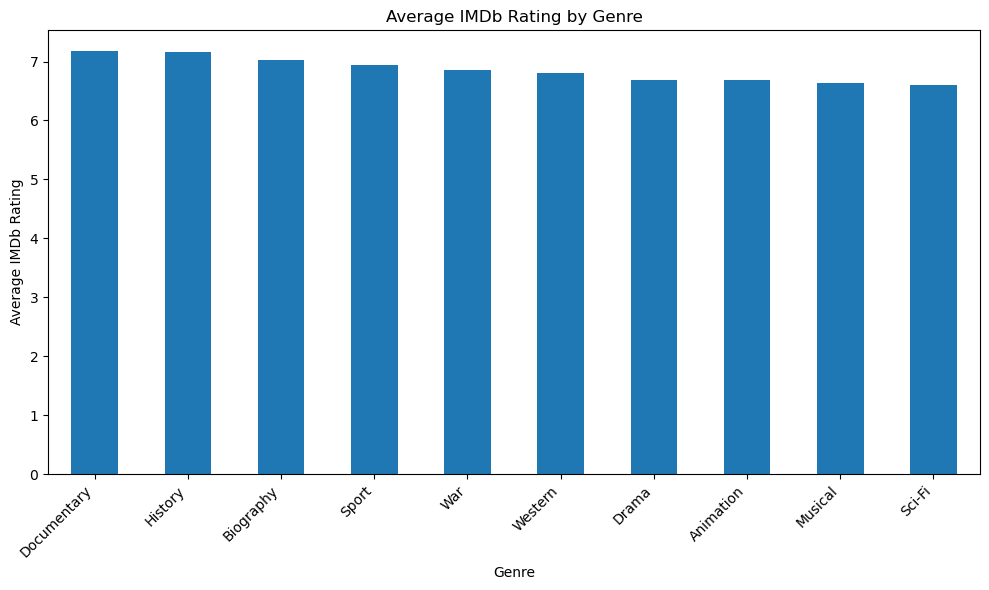

In [85]:
import matplotlib.pyplot as plt

top_genre_ratings = genre_ratings.head(10)

plt.figure(figsize=(10,6))
top_genre_ratings.plot(kind='bar')

plt.title("Average IMDb Rating by Genre")
plt.xlabel("Genre")
plt.ylabel("Average IMDb Rating")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


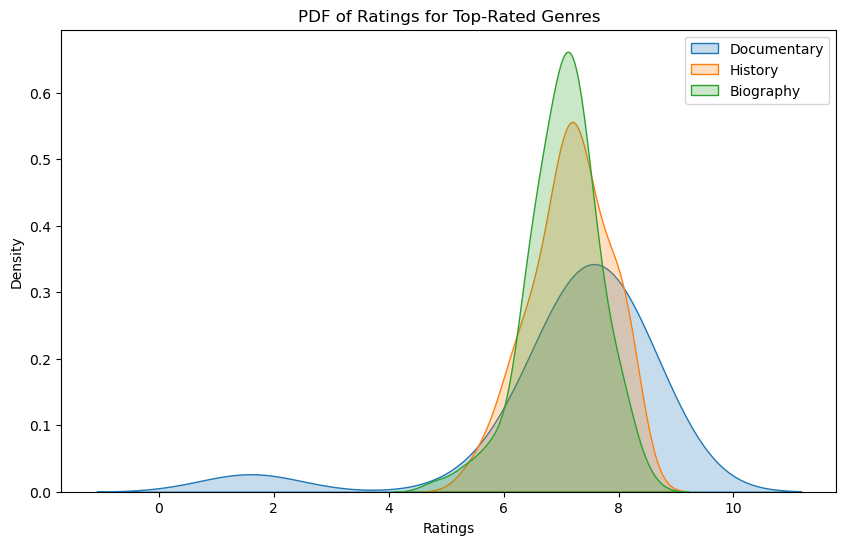

In [86]:
# show the distribution of rating

import seaborn as sns

top_genres = top_genre_ratings.index.tolist()

plt.figure(figsize=(10,6))
for top_g in top_genres[:3]:  # top 3 genres
    sns.kdeplot(
        themovie_df2[themovie_df2['genres'] == top_g]['averagerating'],label=top_g,fill=True
    )

plt.title("PDF of Ratings for Top-Rated Genres")
plt.xlabel("Ratings")
plt.ylabel("Density")
plt.legend()
plt.show()


In [87]:
from scipy.stats import f_oneway

samples = [
    themovie_df2[themovie_df2['genres'] == top_g]['averagerating']
    for top_g in top_genres[:5]
]

f_stat, p_value = f_oneway(*samples)

f_stat, p_value


(0.6941202654410905, 0.5967399371566486)

### Conclusion and Recommendation 
Documentary, History and Biology movies receive the highest average ratings respectively.

A statistical test (ANOVA) on the genres,gave an F-statistic of 0.6941 and a p-value of 0.5967. 
Since the p-value is above 0.05, there’s no meaningful difference in average ratings between these genres.
This Means good ratings can come from any genre.Hence, the studio should not primarily focus of ratings to
measure the success of a movie.


## Which genres generated the most profit Wordwide?

In [88]:
genre_revenue = (
    themovie_df2.groupby('genres')['profit'].mean().sort_values(ascending=False))

genre_revenue.head(20)


genres
Animation    3.227171e+08
Sci-Fi       2.641798e+08
Adventure    2.619090e+08
Action       1.753462e+08
Fantasy      1.555282e+08
Sport        1.404365e+08
Comedy       1.107014e+08
Musical      1.097501e+08
Family       1.046763e+08
Thriller     9.126921e+07
Mystery      7.510733e+07
Horror       6.993425e+07
Music        6.625840e+07
Western      6.078973e+07
Romance      5.978295e+07
Biography    5.497197e+07
Crime        5.352678e+07
Drama        5.143208e+07
History      5.054726e+07
War          1.806302e+07
Name: profit, dtype: float64

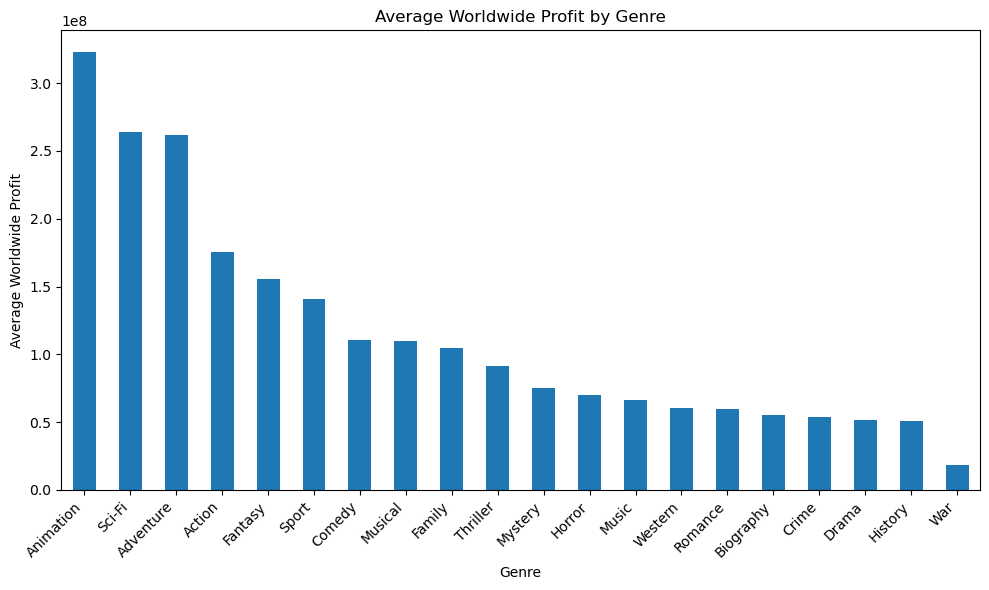

In [89]:
# Select top 10 genres for readability
top_genre_revenue = genre_revenue.head(20)

plt.figure(figsize=(10,6))
top_genre_revenue.plot(kind='bar')

plt.title("Average Worldwide Profit by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Worldwide Profit")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Animation,Sci-Fi and Adventure films generate the highest average worldwide profit, indicating strong global appeal in terms of revenue.The company should prioritize Action and Adventure films when launching its new movie studio.

## Does Movie Rating Guarantees high Profits

In [90]:
correlation = themovie_df2['averagerating'].corr(themovie_df2['profit'])
correlation

0.2567795120039979

## Conclusion and Recomendation 

This is a positive, but not strong. This means,they have a weak relationship.
Higher-rated movies tend to make more profit, But ratings alone do not strongly determine profit.Therefore,good ratings help, but they do not guarantee high profit.

The success of a movie is influenced more by genre and market reach, and not ratings alone.Therefore, the studio should prioritize creating a movie based on genre and market reach but use rating as a secondary metrics.


## Does release date (month) affect worldwide profit?

/tmp/ipykernel_21326/2919649226.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='release_month', y='profit', data=monthly_profit, palette='viridis')


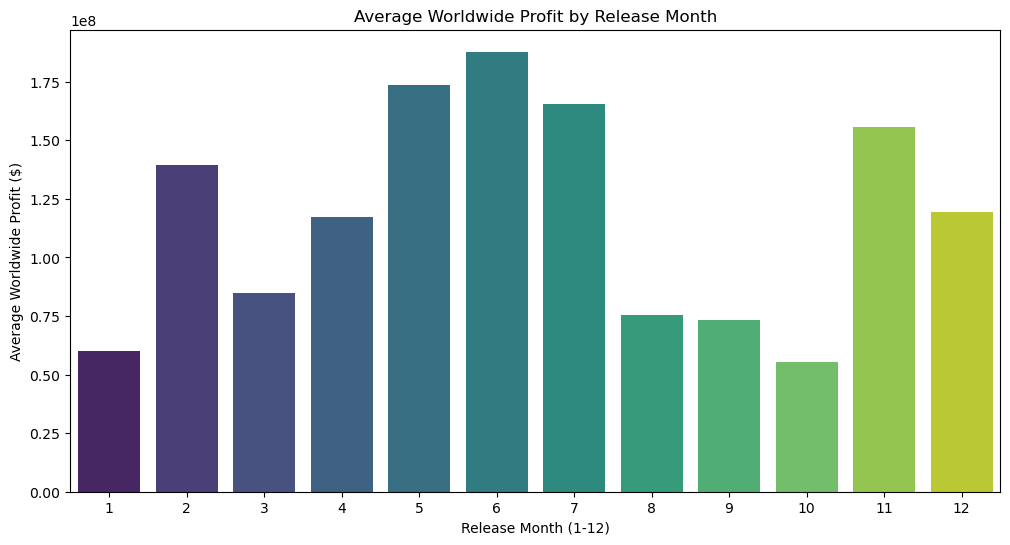

In [91]:
import scipy.stats as stats

# group by release month and calculate mean profit
monthly_profit = themovie_df2.groupby('release_month')['profit'].mean().reset_index()
monthly_profit = monthly_profit.sort_values('release_month')

# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(x='release_month', y='profit', data=monthly_profit, palette='viridis')
plt.title('Average Worldwide Profit by Release Month')
plt.xlabel('Release Month (1-12)')
plt.ylabel('Average Worldwide Profit ($)')
plt.show()


Hypotheses

Null hypothesis:Worldwide profit is the same for all release months.

Alternative hypothesis:At least one release month has a different worldwide profit.

In [92]:

# Prepare data for ANOVA: list of profit arrays for each month
months = themovie_df2['release_month'].unique()
profit_by_month = [themovie_df2[themovie_df2['release_month'] == month]['profit'].values for month in months]

# Perform ANOVA
f_stat, p_value = stats.f_oneway(*profit_by_month)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

F-statistic: 14.852492410836868
P-value: 1.4629188813546632e-28


From the observation we will reject the null hypothesis since our pvalue is less than 0.05
This means release month strongly affect movie profit.Time of release is important,So, Where releasing a movie the studio should consider the month which there are releasing the movie. The should release movies on month 2,5,6,7,11 and 12 since this months have the highest profit rate.They should avoid month 1,8,9 and 10.

## What is the performance of Worldwide gross vs Domestic gross

Goal: Determine whether movies earn more money internationally than domestically and how strongly the two are related.

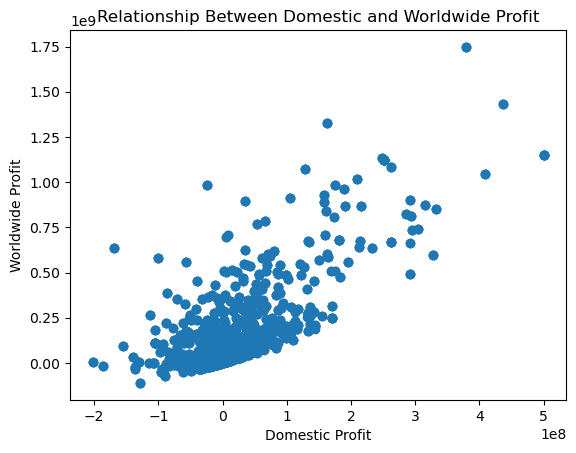

In [93]:
plt.figure()
plt.scatter(themovie_df2["d_profit"], themovie_df2["profit"])
plt.xlabel("Domestic Profit")
plt.ylabel("Worldwide Profit")
plt.title("Relationship Between Domestic and Worldwide Profit")
plt.show()

In [94]:
corr, p_value = stats.pearsonr(themovie_df2["d_profit"], themovie_df2["profit"])

print("Correlation:", corr)
print("P-value:", p_value)

Correlation: 0.7274470666962394
P-value: 0.0


## Conclusion and Recomendation 

The correlation of 0.727447 indicates a very strong positive linear relationship between Domestic gross and worldwide gross
p-value of 0 means the relationship is statistically significant so We reject the null hypothesis of no correlation
This means if a movie makes more money in the domestic market, it is very likely to make more money worldwide as well.Hence 
Domestic performance of a movie should be used as a leading indicator for worldwide success of a movie. 

### Summary of Findings

### Ratings vs Genre
Documentary, History, and Biology films receive the highest average ratings. However, an ANOVA test across genres shows no statistically significant difference in average ratings (F = 0.6941, p = 0.5967). This indicates that high ratings can occur in any genre, and ratings alone are not a reliable measure of a movie’s success.

### Ratings vs Profit
The relationship between movie ratings and profit is positive but weak. Higher-rated movies tend to earn more, but ratings alone do not strongly determine profitability. This suggests that while good ratings help, they do not guarantee high financial success.

### Genre vs Worldwide Profit
Animation, Sci-Fi, and Adventure films generate the highest average worldwide profits, demonstrating strong global appeal. This indicates that genre choice has a greater impact on revenue than ratings. Action and Adventure films, in particular, should be prioritized by the studio.

### Release Month vs Profit
Statistical analysis shows that release month has a significant effect on movie profit (p < 0.05). Movies released in February, May, June, July, November, and December perform best, while releases in January, August, September, and October perform poorly. Timing is therefore a critical factor in maximizing profitability.

### Domestic vs Worldwide Performance
There is a very strong positive correlation between domestic and worldwide gross (r ≈ 0.73, p ≈ 0). This means that movies that perform well domestically are very likely to perform well internationally. Domestic performance can be used as a leading indicator of global success.

### Final Conclusion & Recommendation

Movie success is driven primarily by genre selection, release timing, and market reach, rather than ratings alone. While good ratings contribute positively, they should be treated as a secondary metric.

### Based on Analysis we Recommend
1.Prioritize Genre for Profitability: Focus on producing Action, Adventure, Animation, and Sci-Fi movies, as these genres consistently generate the highest worldwide profits. Ratings are helpful but should not be the primary measure of expected success.

2.Optimize Release Timing: Schedule movie releases in months with historically high profits: February, May, June, July, November, and December. Avoid releasing in January, August, September, and October, which show lower profit potential.

3.Use Domestic Performance as a Predictor: Monitor domestic box office performance closely, as it is a strong indicator of worldwide success. Strong domestic earnings can help predict and maximize global revenue.

4.Leverage Ratings Strategically: While high ratings do not guarantee profit, they can enhance a movie’s marketability. Use ratings as a secondary metric to guide marketing and audience targeting rather than as the primary decision factor for production or release strategy.

